## Import Modules/Libraries

## Setup Paths and other parameters

This is the main cell to change the parameters and imaging paths around.

In [1]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession
# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1785987278969081971
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 48841228288
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
    link {
      device_id: 2
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 8010771583492637493
physical_device_desc: "device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:18:00.0, compute capability: 8.6"
xla_global_id: 416903419
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 48625942528
locality {
  bus_id: 1
  links {
    link {
      type: "StreamExecutor"
      strength: 1
    }
    link {
      device_id: 2
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 8464291652331312781
physical_device_desc: "device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:8a:00.0, compute capability: 8.6"
xla_global_id: 2144165316
, name

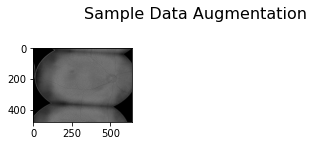

y Labels:  [[1. 0. 0.]]
sample img, max value:  0.53333336
sample img, min value:  0.0


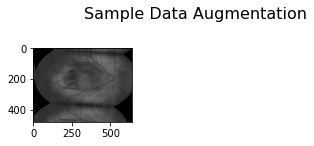

y Labels:  [[1. 0. 0.]]
sample img, max value:  0.48627454
sample img, min value:  0.0


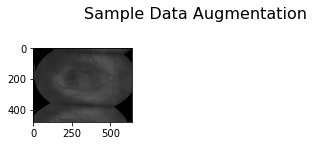

y Labels:  [[1. 0. 0.]]
sample img, max value:  0.43529415
sample img, min value:  0.0


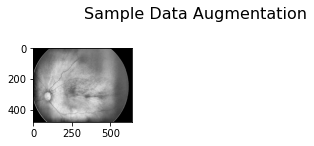

y Labels:  [[0. 0. 1.]]
sample img, max value:  0.9960785
sample img, min value:  0.0


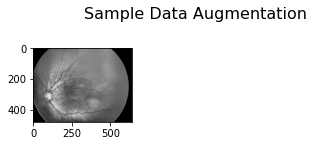

y Labels:  [[0. 0. 1.]]
sample img, max value:  0.97647065
sample img, min value:  0.0


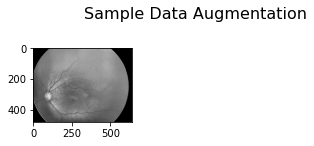

y Labels:  [[0. 0. 1.]]
sample img, max value:  0.9843138
sample img, min value:  0.0


In [2]:
#Cell -1

import tensorflow
import tensorflow as tf
from tensorflow.keras.applications import vgg16, efficientnet, EfficientNetV2S
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Convolution2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras import metrics
from tensorflow.keras.regularizers import l1
from keras.callbacks import ReduceLROnPlateau
import cv2
from PIL import Image
#
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
#
from pathlib import Path
import pandas as pd
import numpy as np
#
from datetime import datetime
import os
import platform
#
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print('Tensorflow Version: ',tensorflow.__version__)
print('tf.keras Version  : ',tensorflow.keras.__version__)

#Cell 0
# %cd C:\Users\Developer\MyProjects\ROP_Plus\ROP_Plus_NoPlus



def change_directory(path):
    try:
        # Change to the specified directory
        os.chdir(path)
        print(f"Changed directory to: {os.getcwd()}")
    except FileNotFoundError:
        print(f"The directory {path} does not exist.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
if __name__ == "__main__":
    # Define the path for both Windows and Linux
    if platform.system() == "Windows":
        path = r"C:\Users\Developer\MyProjects\ROP_Pre-Plus_LightSpec\ROP_LightSpec_Pre-Plus"  # Raw string for Windows
    else:
        path = "/home/developer/Documents/MyProjects/ROP_Pre-Plus_LightSpec/ROP_LightSpec_Pre-Plus"  # Linux path

    change_directory(path)


#Cell 1

ClassNameVar = 'Golden Reading Plus'
#Cell 1
#     fold_num = 5
LayerName1 = 'Red_OutputFinal'
LayerName2 = 'Green_OutputFinal'
LayerName3 = 'Blue_OutputFinal'

X_col = 'posterior_id'
epochs = 90 
fold_num = 1
#
# Image size
img_width, img_height, img_depth =  640, 480, 3



dataPathFirstSeg = '../Dataset/All_Data/'
csvFilesPathFirstSeg = '../Dataset'
#
# Data organization - Training Data
data_dir1 = Path(dataPathFirstSeg + LayerName1 +'/')
csv_dir = Path(csvFilesPathFirstSeg)
csv_name = 'train' + str(fold_num) + '.csv'
csv_path = csv_dir / csv_name
df_train1 = pd.read_csv(csv_path)

df_train1 = df_train1.sample(frac = 1, random_state = fold_num)



data_dir2 = Path(dataPathFirstSeg + LayerName2 +'/')
csv_dir = Path(csvFilesPathFirstSeg)
csv_name = 'train' + str(fold_num) + '.csv'
csv_path = csv_dir / csv_name
df_train2 = pd.read_csv(csv_path)

df_train2 = df_train2.sample(frac = 1, random_state = fold_num)


data_dir3 = Path(dataPathFirstSeg + LayerName3 +'/')
csv_dir = Path(csvFilesPathFirstSeg)
csv_name = 'train' + str(fold_num) + '.csv'
csv_path = csv_dir / csv_name
df_train3 = pd.read_csv(csv_path)

df_train3 = df_train3.sample(frac = 1, random_state = fold_num)



#
# Data organization - Validation and Testing Data
test_data_dir1 = Path(dataPathFirstSeg + LayerName1 + '/')
csv_dir = Path(csvFilesPathFirstSeg)
csv_name = 'valid' + str(fold_num) + '.csv'
csv_path = csv_dir / csv_name
df_test1 = pd.read_csv(csv_path)

test_data_dir2 = Path(dataPathFirstSeg + LayerName2 + '/')
csv_dir = Path(csvFilesPathFirstSeg)
csv_name = 'valid' + str(fold_num) + '.csv'
csv_path = csv_dir / csv_name
df_test2 = pd.read_csv(csv_path)


test_data_dir3 = Path(dataPathFirstSeg + LayerName3 + '/')
csv_dir = Path(csvFilesPathFirstSeg)
csv_name = 'valid' + str(fold_num) + '.csv'
csv_path = csv_dir / csv_name
df_test3 = pd.read_csv(csv_path)

class_names = ['Normal','Pre-Plus','Plus']  # Used for the confusion matrix at the end

# df_test.to_csv('AAAAAAAAAAAAAAAA.csv', index = False)

# Training parameters
#     epochs = 300                     # For fitting the model
freq = epochs // 2              # For saving the model

batch_size = 2 #len(df_train1)               # For fitting the model/ data augmentation parameters
batch_size_valid = 2            # For fitting the model/ data augmentation parameters

# if fold_num == 3 :
#   batch_size = 48                 # For fitting the model/ data augmentation parameters
#   batch_size_valid = 12            # For fitting the model/ data augmentation parameters

num_classes = len(class_names)                  # For the model architecture
train_valid_split = 0.2        # For data-augmentation parameters
#
# Learning rate
learning_rate = 0.00001         # For fitting the model
#
# This is the different layers and their corresponding information
# Layer Number | Name of Layer | Output size | Number of parameters
# -8 block4_conv1 (Conv2D)        (None, 38, 38, 512)       1180160
# _________________________________________________________________
# -7 block4_conv2 (Conv2D)        (None, 38, 38, 512)       2359808
# _________________________________________________________________
# -6 block4_conv3 (Conv2D)        (None, 38, 38, 512)       2359808
# _________________________________________________________________
# -5 block4_pool (MaxPooling2D)   (None, 19, 19, 512)       0
# _________________________________________________________________
# -4 block5_conv1 (Conv2D)        (None, 19, 19, 512)       2359808
# _________________________________________________________________
# -3 block5_conv2 (Conv2D)        (None, 19, 19, 512)       2359808
# _________________________________________________________________
# -2 block5_conv3 (Conv2D)        (None, 19, 19, 512)       2359808
# _________________________________________________________________
# -1 block5_pool (MaxPooling2D)   (None, 9, 9, 512)         0
#
# Transfer learning layers
train_false_layer = -1 # Based on the Layer Number.
#
# I automated this part for binary or non-binary classification.
if num_classes < 2:
    act_type = 'sigmoid'
    class_mode = 'binary'
    loss_fun = 'binary_crossentropy'
else:
    act_type = 'softmax'
    class_mode = 'categorical'
    loss_fun = 'categorical_crossentropy'
#
print('Type of classification: ', class_mode)
print('Loss function: ', loss_fun)
print('Activation function: ', act_type)
len(df_train1)

#Cell 2


data_gen_args = dict(
rescale = 1./255,
brightness_range = [0.5,1.5],
horizontal_flip = True,
vertical_flip = True,
rotation_range = 45.,
zoom_range = 0.4,
height_shift_range = 0.1,
width_shift_range = 0.1,
shear_range = 0.3,

# featurewise_center = True,
# featurewise_std_normalization = True,
# samplewise_std_normalization= True,
# samplewise_center=True,
fill_mode = 'reflect'
# validation_split=train_valid_split
)


print("A")

#
datagen = ImageDataGenerator(
    **data_gen_args)
#
# Train data generator
train_generator1 = datagen.flow_from_dataframe(
    dataframe = df_train1,
    directory = data_dir1,
    x_col = X_col, #LayerName1,
    y_col = ClassNameVar,
    seed= 123,
    target_size = (img_height, img_width),
    class_mode = class_mode,
    color_mode = 'rgb',
    batch_size = batch_size,
    shuffle = True)


#
print("B")
# Train data generator
train_generator2 = datagen.flow_from_dataframe(
    dataframe = df_train2,
    directory = data_dir2,
    x_col = X_col, #LayerName1,
    y_col = ClassNameVar,
    seed= 123,
    target_size = (img_height, img_width),
    class_mode = class_mode,
    color_mode = 'rgb',
    batch_size = batch_size,
    shuffle = True)



# Train data generator
train_generator3 = datagen.flow_from_dataframe(
    dataframe = df_train3,
    directory = data_dir3,
    x_col = X_col, #LayerName1,
    y_col = ClassNameVar,
    seed= 123,
    target_size = (img_height, img_width),
    class_mode = class_mode,
    color_mode = 'rgb',
    batch_size = batch_size,
    shuffle = True)



# Validation data generator
valid_data_gen_args = dict(
    rescale = 1./255,
)

valid_datagen = ImageDataGenerator(
    **valid_data_gen_args)




valid_generator1 = valid_datagen.flow_from_dataframe(
    dataframe = df_test1,
    directory = test_data_dir1,
    x_col = X_col, #LayerName1,
    y_col = ClassNameVar,
    seed=123,
    # subset = 'validation',
    target_size = (img_height, img_width),
    class_mode = class_mode,
    color_mode = 'rgb',
    batch_size = batch_size_valid,
    shuffle = True)
#

valid_generator2 = valid_datagen.flow_from_dataframe(
    dataframe = df_test2,
    directory = test_data_dir2,
    x_col = X_col, #LayerName1,
    y_col = ClassNameVar,
    seed=123,
    # subset = 'validation',
    target_size = (img_height, img_width),
    class_mode = class_mode,
    color_mode = 'rgb',
    batch_size = batch_size_valid,
    shuffle = True)


valid_generator3 = valid_datagen.flow_from_dataframe(
    dataframe = df_test3,
    directory = test_data_dir3,
    x_col = X_col, #LayerName1,
    y_col = ClassNameVar,
    seed=123,
    # subset = 'validation',
    target_size = (img_height, img_width),
    class_mode = class_mode,
    color_mode = 'rgb',
    batch_size = batch_size_valid,
    shuffle = True)



def combine_generator(gen1, gen2, gen3):
    while True:
        x_gen1,y_gen1 = next(gen1)
        x_gen2,y_gen2 = next(gen2)
        x_gen3,y_gen3 = next(gen3)
        x_gen_merge=tf.concat([x_gen1, x_gen2, x_gen3], -1)
        yield(x_gen_merge, y_gen1)

combine_train_generator = combine_generator(train_generator1, train_generator2,train_generator3)
combine_valid_generator = combine_generator(valid_generator1, valid_generator2,valid_generator3)

X_combine_train, y_combine_train = next(combine_train_generator)
X_combine_valid, y_combine_valid = next(combine_valid_generator)




# Preview the augmented data
X_preview = X_combine_train[:,:,:,:3]
y_preview = y_combine_train

print(X_preview.shape)
#
for k in range(1,2):
    sample_img = X_preview[k,:,:,:]
    plt.subplot(2, 3, k)
    plt.imshow(sample_img)
plt.suptitle('Sample Data Augmentation', fontsize = 16)
plt.show()
#
print('y Labels: ', y_preview[1:5])
print('sample img, max value: ',np.max(sample_img))
print('sample img, min value: ',np.min(sample_img))


# Preview the augmented data
X_preview = X_combine_train[:,:,:,3:6]
y_preview = y_combine_train
#
for k in range(1,2):
    sample_img = X_preview[k,:,:,:]
    plt.subplot(2, 3, k)
    plt.imshow(sample_img)
plt.suptitle('Sample Data Augmentation', fontsize = 16)
plt.show()
#
print('y Labels: ', y_preview[1:5])
print('sample img, max value: ',np.max(sample_img))
print('sample img, min value: ',np.min(sample_img))


# Preview the augmented data
X_preview = X_combine_train[:,:,:,6:]
y_preview = y_combine_train
#
for k in range(1,2):
    sample_img = X_preview[k,:,:,:]
    plt.subplot(2, 3, k)
    plt.imshow(sample_img)
plt.suptitle('Sample Data Augmentation', fontsize = 16)
plt.show()
#
print('y Labels: ', y_preview[1:5])
print('sample img, max value: ',np.max(sample_img))
print('sample img, min value: ',np.min(sample_img))

#Cell 3

# Preview the augmented data

#Cell 4

# Preview the augmented data
X_preview_val = X_combine_valid[:,:,:,:3]
y_preview_val = y_combine_valid


for k in range(1,2):
    sample_img = X_preview_val[k,:,:,:]
    plt.subplot(2, 3, k)
    plt.imshow(sample_img)
plt.suptitle('Sample Data Augmentation', fontsize = 16)
plt.show()
#
print('y Labels: ', y_preview_val[1:5])
print('sample img, max value: ',np.max(sample_img))
print('sample img, min value: ',np.min(sample_img))



# Preview the augmented data
X_preview_val = X_combine_valid[:,:,:,3:6]
y_preview_val = y_combine_valid


for k in range(1,2):
    sample_img = X_preview_val[k,:,:,:]
    plt.subplot(2, 3, k)
    plt.imshow(sample_img)
plt.suptitle('Sample Data Augmentation', fontsize = 16)
plt.show()
#
print('y Labels: ', y_preview_val[1:5])
print('sample img, max value: ',np.max(sample_img))
print('sample img, min value: ',np.min(sample_img))



# Preview the augmented data
X_preview_val = X_combine_valid[:,:,:,6:]
y_preview_val = y_combine_valid


for k in range(1,2):
    sample_img = X_preview_val[k,:,:,:]
    plt.subplot(2, 3, k)
    plt.imshow(sample_img)
plt.suptitle('Sample Data Augmentation', fontsize = 16)
plt.show()
#
print('y Labels: ', y_preview_val[1:5])
print('sample img, max value: ',np.max(sample_img))
print('sample img, min value: ',np.min(sample_img))



In [3]:

#Cell 5
#########################Distribute####################################
#     strategy = tf.distribute.MirroredStrategy()
#     print("Number of devices: {}".format(strategy.num_replicas_in_sync))

#     with strategy.scope():
from keras.layers import Lambda
from tensorflow.keras.layers import Concatenate

def filterChannel(inputDataFromPrevLayer, maskIn = [1,1,1]):
    branch_outputs = []
    mask = maskIn
    for i in range(img_depth):
        if i == 0:
            out = inputDataFromPrevLayer[:,:,:,0]*mask[i]
        elif i == 1:
            out = inputDataFromPrevLayer[:,:,:,1]*mask[i]
        elif i == 2:
            out = inputDataFromPrevLayer[:,:,:,2]*mask[i]

        # out = inputDataFromPrevLayer[:,:,:,i]*mask[i]
        branch_outputs.append(tf.expand_dims(out, axis=-1))

    return Concatenate(axis = -1)(branch_outputs)

import inspect
filterChannelFuncRepr, filterChannelLine_no = inspect.getsourcelines(filterChannel)



def creatModel(modelNumber, model_image_input):
    base_model = EfficientNetV2S(
        input_tensor = model_image_input,
        include_top = False,
        weights = 'imagenet'
    )
    #

#             for layer in base_model.layers:
#               layer.trainable = False

    for layer in base_model.layers:
      layer._name = layer._name + str(modelNumber)

    base_output = base_model.layers[-1].output

    return base_output



from keras.layers import Lambda
from tensorflow.keras.layers import Concatenate

def layerSlicer(inputDataFromPrevLayer):
    inputL1 = inputDataFromPrevLayer[:,:,:,:3]
    # tf.shape(inputL1)
    inputL2 = inputDataFromPrevLayer[:,:,:,3:6]
    inputL3 = inputDataFromPrevLayer[:,:,:,6:]
    return inputL1,inputL2,inputL3






#Cell 6


# Build Model
from tensorflow import keras
from tensorflow.keras import layers
totalLayerNumber = 3
#     inputAll= Input(shape = (img_width, img_height, totalLayerNumber*img_depth))
inputAll = Input(shape = (img_height, img_width, totalLayerNumber*img_depth))
xl1, xl2, xl3 = Lambda(layerSlicer)(inputAll)

baseModeInput1 = Lambda(filterChannel)(xl1, [1,1,1])
baseModeInput2 = Lambda(filterChannel)(xl2, [1,1,1])
baseModeInput3 = Lambda(filterChannel)(xl3, [1,1,1])

base_out1 = creatModel(1,baseModeInput1)
base_out2 = creatModel(2,baseModeInput2)
base_out3 = creatModel(3,baseModeInput3)




#############################

#     flatA1 = Flatten()(base_out1)
flatA1 = tf.keras.layers.GlobalAveragePooling2D()(base_out1)
dropOutflatA1 = Dropout(0.1)(flatA1)
fcA1 = Dense(1000, activation = 'relu')(dropOutflatA1)
#     fcA2 = Dense(4096, activation = 'relu')(fcA1)
outputA = Dense(num_classes, activation = act_type)(fcA1)


modelA = Model(xl1, outputA)
#         checkpoint_pathA = Path('Result/fold_num_'+ str(fold_num) +'early_stop_model_Red.hdf5')
#         modelA.load_weights(checkpoint_pathA)

# for layer in modelA.layers:
#     layer.trainable = False

#

#     flatB1 = Flatten()(base_out2)
flatB1 = tf.keras.layers.GlobalAveragePooling2D()(base_out2)
dropOutflatB1 = Dropout(0.1)(flatB1)
fcB1 = Dense(1000, activation = 'relu')(dropOutflatB1)
#     fcB2 = Dense(4096, activation = 'relu')(fcB1)
outputB = Dense(num_classes, activation = act_type)(fcB1)

modelB = Model(xl2, outputB)
#         checkpoint_pathB = Path('Result/fold_num_'+ str(fold_num) +'early_stop_model_Green.hdf5')
#         modelB.load_weights(checkpoint_pathB)

# for layer in modelB.layers[:-1]:
#     layer.trainable = False
#
#
#

#     flatC1 = Flatten()(base_out3)
flatC1 = tf.keras.layers.GlobalAveragePooling2D()(base_out3)
dropOutflatC1 = Dropout(0.1)(flatC1)
fcC1 = Dense(1000, activation = 'relu')(dropOutflatC1)
#     fcC2 = Dense(4096, activation = 'relu')(fcC1)
outputC = Dense(num_classes, activation = act_type)(fcC1)

modelC = Model(xl3, outputC)
#         checkpoint_pathC = Path('Result/fold_num_'+ str(fold_num) +'early_stop_model_Blue.hdf5')
#         modelC.load_weights(checkpoint_pathC)

# for layer in modelC.layers[:-1]:
#     layer.trainable = False
#
#

initializerA = modelA.layers[-3].get_weights()
initializerB = modelB.layers[-3].get_weights()
initializerC = modelC.layers[-3].get_weights()

############################



print("########################## \n")
print(tf.shape(modelC.layers[-4].output))
print("# \n")
print(tf.shape(modelC.layers[-5].output))
print("# \n")
print(tf.shape(modelC.layers[-3].output))

concatBaseOutput =   Concatenate()([modelA.layers[-5].output,modelB.layers[-5].output,modelC.layers[-5].output])



#         customConv1 = Convolution2D(filters=totalLayerNumber*1280, kernel_size=(3,3), padding="same", activation="relu")(concatBaseOutput)

# customCMaxpool1 = MaxPool2D(pool_size=(2,2),strides=(2,2))(customConv1)


# initializer10 = tf.concat([initializerA[0], initializerB[0], initializerC[0]], 0)
# initializer11 = tf.concat([initializerA[1], initializerB[1], initializerC[1]], 0)


# print(len(initializerA[0]))
# print(len(initializerA[1]))


# print(len(initializer10))
# print(len(initializer11))

# initializer2 = modelA.layers[-2].get_weights()
# initializerOut = modelA.layers[-1].get_weights()

#         flat1 = Flatten()(customConv1)
flat1 = tf.keras.layers.GlobalAveragePooling2D()(concatBaseOutput)
dropOutflat = Dropout(0.1)(flat1)
fc1 = Dense(1000, activation = 'relu')(dropOutflat)
#     # fc1.build(input_shape=[None,41472])
#     # fc1.set_weights([initializer10, initializer11])
#     fc1Out = fc1(dropOutflat)


#     # dropfc1 = Dropout(0.3)(fc1)
#     fc2 = Dense(4096, activation = 'relu')
#     # fc2.build(input_shape=[None,len(initializer2[0])])
#     # fc2.set_weights([initializer2[0], initializer2[1]])
#     fc2Out = fc2(fc1Out)

output = Dense(num_classes, activation = act_type)(fc1)
#     # output.build(input_shape=[None,len(initializerOut[0])])
#     # output.set_weights([initializerOut[0], initializerOut[1]])
#     outputOut= output(fc1Out)
#Behro


model = Model(inputAll, output)


# model.summary()



########################## 

KerasTensor(type_spec=TensorSpec(shape=(2,), dtype=tf.int32, name=None), inferred_value=[None, 1280], name='tf.compat.v1.shape/Shape:0', description="created by layer 'tf.compat.v1.shape'")
# 

KerasTensor(type_spec=TensorSpec(shape=(4,), dtype=tf.int32, name=None), inferred_value=[None, 15, 20, 1280], name='tf.compat.v1.shape_1/Shape:0', description="created by layer 'tf.compat.v1.shape_1'")
# 

KerasTensor(type_spec=TensorSpec(shape=(2,), dtype=tf.int32, name=None), inferred_value=[None, 1280], name='tf.compat.v1.shape_2/Shape:0', description="created by layer 'tf.compat.v1.shape_2'")


In [ ]:

#Cell 7

# Compile the model
METRICS = [
    metrics.TruePositives(name='tp'),
    # metrics.FalsePositives(name='fp'),
    # metrics.TrueNegatives(name='tn'),
    # metrics.FalseNegatives(name='fn'),
    metrics.CategoricalAccuracy(name='accuracy'),
    # metrics.Precision(name='precision'),
    # metrics.Recall(name='recall'),
    # metrics.AUC(name='auc'),
    # metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

opt = Adam(learning_rate = learning_rate)
#
model.compile(
    loss = loss_fun,
    optimizer = opt,
    # metrics = ['accuracy']
    metrics= METRICS
)

################################Distribute###############################

#Cell 8

# Folder setup
if not os.path.isdir('Result'):
    os.mkdir('Result')

init_time = datetime.now()
current_time = init_time.strftime('%Y%m%d_%H%M%S')
name_dir = 'Result/trained_models_' + current_time + '_fold_num' + str(fold_num) + '_' + str(LayerName1) + str(LayerName2) + str(LayerName3)
os.mkdir(name_dir)
#
# Callbacks1: ModelCheckpointer
model_file_format = name_dir + '/model_' + str(fold_num) + '_model.{epoch:04d}.hdf5'
check = ModelCheckpoint(
    model_file_format,
    save_freq = freq, # The 'freq' parameter is defined previously as "epoch // 2", I want to save 2 model weights for comparison.
    verbose = 1,
    save_weights_only=True # We only save the weights, because if we save all the information, its 2.9 GB per file. Too much data.
)

checkpointer = ModelCheckpoint(
    model_file_format,
    period = 10,
    save_best_only=False,
    save_weights_only=True
)
#
# Callbacks2: EarlyStopping
early_stop = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=20,
    verbose=0,
    mode='auto',
    restore_best_weights=True
)
#
# Plot model
figure_name = name_dir + '/model_output.png'
#
plot_model(
    model,
    figure_name,
    show_shapes = True
)
#
# Display model
# model.summary()


#Cell 9

class_weights = compute_class_weight(
    class_weight = 'balanced',
    classes = np.unique(train_generator1.classes),
    y = train_generator1.classes
)
class_weights = dict(enumerate(class_weights))
#
nb_train_samples = len(train_generator1.classes)
nb_valid_samples = len(valid_generator1.classes)
#
steps_per_epoch_param = nb_train_samples // batch_size
validation_steps_param = nb_valid_samples // batch_size_valid
#
print('nb_train_samples: ',nb_train_samples)
print('nb_valid_samples: ',nb_valid_samples)
print('steps_per_epoch_param: ',steps_per_epoch_param)
print('validation_steps_param: ',validation_steps_param)
print(class_weights)


#Cell 10


from keras.callbacks import EarlyStopping
class MyEarlyStopping(EarlyStopping):
    def __init__(self, *args, **kw):
        super().__init__(*args, **kw)
        self.baseline_attained = False

    def on_epoch_end(self, epoch, logs=None):
        if not self.baseline_attained:
            current = self.get_monitor_value(logs)
            if current is None:
                return

            if self.monitor_op(current, self.baseline):
                if self.verbose > 0:
                    print(' Baseline attained.')
                self.baseline_attained = True
                print("\nBefore   %f." %self.model.optimizer.learning_rate)
                self.model.optimizer.learning_rate = self.model.optimizer.learning_rate
                print("\nAfter   %f." %self.model.optimizer.learning_rate)

            else:
                return

        super(MyEarlyStopping, self).on_epoch_end(epoch, logs)

#Cell 11

es1  = MyEarlyStopping(monitor='val_loss',verbose=1,min_delta=0.000,patience=0,baseline=0.20)
es2  = MyEarlyStopping(monitor='val_accuracy',verbose=1,min_delta=0.000,patience=0,baseline=0.95)

#Cell 12

from keras.callbacks import EarlyStopping
from keras.utils import io_utils
class customErlyStopping(EarlyStopping):
    def __init__(self , customMode = 'greater_equal', *args, **kw ):
        super().__init__(*args, **kw)
        self.customMode = customMode
        if self.customMode == 'greater_equal':
            self.monitor_op = np.greater_equal

    def on_train_end(self, logs=None):
        super().on_train_end()
        if self.stopped_epoch == 0 and self.verbose > 0:
            if self.restore_best_weights and self.best_weights is not None:
                self.model.set_weights(self.best_weights)
                io_utils.print_msg(
                'Restoring model weights from the end of the best epoch: '
                f'{self.best_epoch + 1}.')
            print("Beh best weight just restored")


#Cell 13

monitorFor_es4 = 'val_accuracy'
patienceFor_es4 = 100
es4= customErlyStopping(
    monitor= monitorFor_es4,
    verbose=1,
    patience= patienceFor_es4,
    mode='auto',
    customMode = 'None',
    restore_best_weights=True)

# Custom callback function
class CustomEarlyStopping2(tf.keras.callbacks.Callback):
    def __init__(self, patience=20):
        super(CustomEarlyStopping2, self).__init__()
        self.patience = patience
        self.counter = 0
        self.best_loss = float('inf')
        self.best_accuracy = float('-inf')
        self.best_epoch = float('-inf')
        self.best_weights = None

    def on_epoch_end(self, epoch, logs=None):
        val_loss = logs['val_loss']
        val_accuracy = logs['val_accuracy']
        if val_accuracy > self.best_accuracy:
          self.best_accuracy = val_accuracy
          self.best_weights = self.model.get_weights()
          self.best_epoch = epoch

        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
            # self.best_weights = self.model.get_weights()
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.model.stop_training = True
                print("Early stopping: Training stopped due to no improvement in validation loss. best_epoch = ", self.best_epoch)
                if self.best_weights is not None:
                  self.model.set_weights(self.best_weights)
                print("Best weights loaded.")

# Create an instance of the custom callback
es5 = CustomEarlyStopping2(patience=20)

#Cell 14
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                        patience=20,
                                        verbose=1,
                                        factor=0.5,
                                        min_lr=0.000001)
# epochs = 1500
# combine_train_generator = combine_generator(train_generator1, train_generator2,train_generator3)
# combine_valid_generator = combine_generator(valid_generator1, valid_generator2,valid_generator3)
history = model.fit(combine_train_generator,
                            epochs = epochs,
                            steps_per_epoch = steps_per_epoch_param,
                            validation_data = combine_valid_generator,
                            validation_steps = validation_steps_param,
                            # callbacks = [early_stop],
                            callbacks = [es5, checkpointer],
                            class_weight = class_weights
                            )
#
early_stop_name = name_dir + '/fold_num_' + str(fold_num) + 'early_stop_model.hdf5'
model.save_weights(early_stop_name)



#Cell 15

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

val_tp = history.history['val_tp']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.05])
plt.title('Training and Validation Accuracy'+' (fold_num' + str(fold_num)+')')



plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss'+' (fold_num' + str(fold_num)+')')
plt.xlabel('epoch')
# plt.show()

plot_name = name_dir + '/Training and Validation'+'(fold_num'+ str(fold_num) +')'+ '.png'
plt.savefig(plot_name)


#Cell 16

print('Min val_loss=' + str(np.min(val_loss)) +'      val_acc='+ str(val_acc[np.argmin(val_loss)]))

#Cell 17

np.argmin(val_loss)

#Cell 18


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                        normalize=False,
                        title=None,
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes#[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes, yticklabels=classes,
        title=title,
        ylabel='True label',
        xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



#Cell 19



test_data_gen_args = dict(
    rescale = 1./255,
)

test_datagen = ImageDataGenerator(
    **test_data_gen_args)

test_generator1 = test_datagen.flow_from_dataframe(
    dataframe = df_test1,
    directory = test_data_dir1,
    x_col =  X_col, #LayerName,
    y_col = ClassNameVar,
#     target_size = (img_width, img_height),
    target_size = (img_height, img_width),
    class_mode = class_mode,
    color_mode = 'rgb',
    batch_size = len(df_test1))


test_generator2 = test_datagen.flow_from_dataframe(
    dataframe = df_test2,
    directory = test_data_dir2,
    x_col =  X_col, #LayerName,
    y_col = ClassNameVar,
#     target_size = (img_width, img_height),
    target_size = (img_height, img_width),
    class_mode = class_mode,
    color_mode = 'rgb',
    batch_size = len(df_test2))


test_generator3 = test_datagen.flow_from_dataframe(
    dataframe = df_test3,
    directory = test_data_dir3,
    x_col =  X_col, #LayerName,
    y_col = ClassNameVar,
#     target_size = (img_width, img_height),
    target_size = (img_height, img_width),
    class_mode = class_mode,
    color_mode = 'rgb',
    batch_size = len(df_test3))



combine_test_generator = combine_generator(test_generator1, test_generator2,test_generator3)
#
X, y_true = [], []
#
# print(len(df_test))
i = 0
while i < 1:
    temp_X, temp_y_true = next(combine_test_generator)
    if i < 1:
        X = temp_X
        y_true = temp_y_true
    else:
        X = np.concatenate((X, temp_X), axis=0)
        y_true = np.concatenate((y_true, temp_y_true), axis = 0)
    i += 1
print(X.shape)

X_test_preview = X[k,:,:,:3]
for k in range(1,4):
    sample_img = X_test_preview
    plt.subplot(2, 3, k)
    plt.imshow(sample_img)
plt.suptitle('Samples of Test Dataset '+str(LayerName1), fontsize = 16)
plt.show()


X_test_preview = X[k,:,:,3:6]
for k in range(1,4):
    sample_img = X_test_preview
    plt.subplot(2, 3, k)
    plt.imshow(sample_img)
plt.suptitle('Samples of Test Dataset '+str(LayerName2), fontsize = 16)
plt.show()


X_test_preview = X[k,:,:,6:]
for k in range(1,4):
    sample_img = X_test_preview
    plt.subplot(2, 3, k)
    plt.imshow(sample_img)
plt.suptitle('Samples of Test Dataset '+str(LayerName3), fontsize = 16)
plt.show()



if len(class_names) == 2:
    y_pred = np.around(model.predict(X),0)
    y_pred = np.reshape(y_pred, (1, len(y_pred)))
    y_pred = y_pred[0]
else:
    y_pred = model.predict(X)


# Initialize lists to store correct and incorrect predictions
correct_rows = []
incorrect_rows = []

# Loop through the predictions and true labels
for i in range(len(X)):
    img_name = df_valid.iloc[i][X_col]  # Assuming LayerName contains the image filename
    true_label = y_true.argmax(axis=1)[i]
    pred_label = y_pred.argmax(axis=1)[i]
#     print(f'true_label {true_label} pred_label {np.round(pred_label)} ')
    # Check if the prediction is correct
    if np.array_equal(true_label, pred_label):
        correct_rows.append(df_valid.iloc[i])  # Save correct row
    else:
        incorrect_rows.append(df_valid.iloc[i])  # Save incorrect row

# Convert lists to DataFrames
df_correct = pd.DataFrame(correct_rows)
df_incorrect = pd.DataFrame(incorrect_rows)

# Save the DataFrames to CSV files
df_correct.to_csv(name_dir + '/correct_valid_predictions'+str(fold_num)+'.csv', index=False)
df_incorrect.to_csv(name_dir + '/incorrect_valid_predictions'+str(fold_num)+'.csv', index=False)

print(f'Saved {len(correct_rows)} correct predictions and {len(incorrect_rows)} incorrect predictions. Valid')


#Cell 20

title_mat = 'Confusion matrix, with normalization, fold: ' + str(fold_num)
plot_name = name_dir + '/confusion_matrix_fold' + str(fold_num) + '.png'
if len(class_names) == 2:
    print('Binary Classification')
    print('---------------------')
    plot_confusion_matrix(y_true,
                        y_pred,
                        classes = class_names,
                        normalize = False,
                        title = title_mat)
    plt.savefig(plot_name)
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

else:
    print('Categorical Classification')
    print('---------------------')
    plot_confusion_matrix(y_true.argmax(axis=1),
                        y_pred.argmax(axis=1),
                        classes = class_names,
                        normalize = False,
                        title = title_mat)
    plt.savefig(plot_name)
    cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))
    print(cm)

cm1 = cm

CM_name = name_dir + '/CM' + str(fold_num) + '.csv'
pd.DataFrame(cm1).to_csv(CM_name,index=False)

plt.show()


#Cell 21

# Disease      TP      FN
#       True
# Healthy      FP      TN
#         Disease     Healthy
#                Pred

def binAccuracy(mat2D):
    tp = mat2D[0][0]
    tn = mat2D[1][1]
    fp = mat2D[1][0]
    fn = mat2D[0][1]
    res = (tp+tn) / (tp+tn+fp+fn)
    return res

def binSensitivity(mat2D):
    tp = mat2D[0][0]
    tn = mat2D[1][1]
    fp = mat2D[1][0]
    fn = mat2D[0][1]
    res = tp / (tp+fn)
    return res


def binSpecificity(mat2D):
    tp = mat2D[0][0]
    tn = mat2D[1][1]
    fp = mat2D[1][0]
    fn = mat2D[0][1]
    res = tn / (tn+fp)
    return res


#Cell 22
def creat2DConfusionMatrix(categoryIndex, conf_mat, sizeofCategory = class_names):
  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var[0][0] = conf_mat[categoryIndex][categoryIndex]
  # print("mat2D_var[0][0]:  {} {}".format(categoryIndex, categoryIndex))
  for intI in range(0,len(sizeofCategory)):
    if intI != categoryIndex:
      mat2D_var[0][1] += conf_mat[categoryIndex][intI]
      # print("mat2D_var[0][1]:  {} {}".format(categoryIndex, intI))
      mat2D_var[1][0] += conf_mat[intI][categoryIndex]
      # print("mat2D_var[1][0]:  {} {}".format(intI, categoryIndex))

  for intI in range(0,len(sizeofCategory)):
    for intJ in range(0,len(sizeofCategory)):
      if intI != categoryIndex and intJ != categoryIndex:
        mat2D_var[1][1] += conf_mat[intI][intJ]
        # print("mat2D_var[1][1]:  {} {}".format(intI, intJ))

  return mat2D_var

######################################
def accuracyCalculator(conf_mat):
  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(0,conf_mat)
  C1_acc = binAccuracy(mat2D_var)

  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(1,conf_mat)
  C2_acc = binAccuracy(mat2D_var)

  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(2,conf_mat)
  C3_acc = binAccuracy(mat2D_var)

#   mat2D_var =np.array(([0,0],[0,0]))
#   mat2D_var = creat2DConfusionMatrix(3,conf_mat)
#   C4_acc = binAccuracy(mat2D_var)

  result = []
#   result.append([C1_acc,C2_acc,C3_acc, C4_acc])
  result.append([C1_acc,C2_acc,C3_acc])

  return np.squeeze(result)
###########################################################
def sensitivityCalculator(conf_mat):
  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(0,conf_mat)
  C1_acc = binSensitivity(mat2D_var)


  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(1,conf_mat)
  C2_acc = binSensitivity(mat2D_var)


  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(2,conf_mat)
  C3_acc = binSensitivity(mat2D_var)

#   mat2D_var =np.array(([0,0],[0,0]))
#   mat2D_var = creat2DConfusionMatrix(3,conf_mat)
#   C4_acc = binSensitivity(mat2D_var)

  result = []
#   result.append([C1_acc,C2_acc,C3_acc, C4_acc])
  result.append([C1_acc,C2_acc,C3_acc])

  return np.squeeze(result)
################################################################
def specificityCalculator(conf_mat):
  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(0,conf_mat)
  C1_acc = binSpecificity(mat2D_var)

  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(1,conf_mat)
  C2_acc = binSpecificity(mat2D_var)

  mat2D_var =np.array(([0,0],[0,0]))
  mat2D_var = creat2DConfusionMatrix(2,conf_mat)
  C3_acc = binSpecificity(mat2D_var)

#   mat2D_var =np.array(([0,0],[0,0]))
#   mat2D_var = creat2DConfusionMatrix(3,conf_mat)
#   C4_acc = binSpecificity(mat2D_var)

  result = []
#   result.append([C1_acc,C2_acc,C3_acc, C4_acc])
  result.append([C1_acc,C2_acc,C3_acc])

  return np.squeeze(result)

#######################################
#Cell 25

param_dict = {
    'class_weights':class_weights,
    'fold_num': fold_num,
    'num_classes': num_classes,
    'epochs': epochs,
    'batch_size': batch_size,
    'learning_rate': learning_rate,
    'img_width': img_width,
    'img_height': img_height,
    'img_depth': img_depth,
    'act_type': act_type,
    'class_mode': class_mode,
    'loss_fun': loss_fun,
    'train_false_layer': train_false_layer,
    'train_valid_split': train_valid_split,
    'data_dir1': data_dir1,
    'test_data_dir1': test_data_dir1,
    'data_dir2': data_dir2,
    'test_data_dir2': test_data_dir2,
    'data_dir3': data_dir3,
    'test_data_dir3': test_data_dir3,
    'name_dir': name_dir
}
#

f = open(os.path.join(name_dir, 'train_param.txt'), 'w')
f.write( 'dict = ' + repr(param_dict) + '\n' )
f.write( 'data_gen = ' + repr(data_gen_args) + '\n')
f.write( 'cm1 = ' + repr(cm1) + '\n')
f.write( 'accuracyCalculator = ' + repr(accuracyCalculator(cm1)) + '\n')
f.write( 'sensitivityCalculator = ' + repr(sensitivityCalculator(cm1)) + '\n')
f.write( 'specificityCalculator = ' + repr(specificityCalculator(cm1)) + '\n')
f.write( 'Min val_loss_'+ repr(np.argmin(val_loss)) + ' = '+ str(np.min(val_loss)) +'      val_acc='+ str(val_acc[np.argmin(val_loss)]) +'      val_tp='+ str(val_tp[np.argmin(val_loss)]) + '\n')
f.write( 'Max val_acc_'+ repr(np.argmax(val_acc)) + ' = '+ str(np.max(val_acc)) +'      val_loss='+ str(val_loss[np.argmax(val_acc)]) + '      val_tp='+ str(val_tp[np.argmax(val_acc)]) + '\n')
f.write( 'Max val_tp_'+ repr(np.argmax(val_tp)) + ' = '+ str(np.max(val_tp)) +'      val_loss='+ str(val_loss[np.argmax(val_tp)]) + '      val_acc='+ str(val_acc[np.argmax(val_tp)]) + '\n')
f.write( 'monitorFor_es4 : '+ str(monitorFor_es4) + '\n')
f.write( 'patienceFor_es4 : '+ str(patienceFor_es4) + '\n')

model.summary(print_fn=lambda x: f.write(x + '\n'))


f.write(str(''.join(filterChannelFuncRepr)) + '\n' )
f.close()


#Cell 26

from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def AUC_Multiclass(classNames,yTrue,yPred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classNames)):
        fpr[i], tpr[i], _ = roc_curve(yTrue[:, i], yPred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    plt.figure()
    for i in range(len(classNames)):
        plt.plot(fpr[i], tpr[i], label= str(classNames[i])+ ' (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")

#Cell 27

yTrue1 = y_true
yPred1 = y_pred

AUC_Multiclass(class_names,yTrue1,yPred1)
plot_name = name_dir + '/AUC_fold' + str(fold_num) + '.png'
plt.savefig(plot_name)

plt.show()

# import gc
# del model,df_train1,data_dir1,train_generator1,df_test1,test_data_dir1,valid_generator1,test_generator1
# del df_train2,data_dir2,train_generator2,df_test2,test_data_dir2,valid_generator2,test_generator2


# del tf,efficientnet,vgg16,ImageDataGenerator,Adam,Model,Input, Convolution2D, MaxPool2D, Dense,
# del Flatten, Dropout,TensorBoard, ModelCheckpoint, EarlyStopping,plot_model,metrics,plt,train_test_split,compute_class_weight,Path,pd,np,datetime,os,device_lib,tensorflow

# gc.collect()


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
nb_train_samples:  1360
nb_valid_samples:  340
steps_per_epoch_param:  680
validation_steps_param:  170
{0: 0.5834405834405835, 1: 5.738396624472574, 2: 0.8994708994708994}
Epoch 1/90
223/680 [========>.....................] - ETA: 2:28 - loss: 1.1302 - tp: 0.0000e+00 - accuracy: 0.4574

In [ ]:

# FoldList = [1,2,3,4,5]

layersList = ['Red_OutputFinal','Green_OutputFinal', 'Blue_OutputFinal']
FoldList = [1]

FoldList.reverse()

# for foldVariable in FoldList:
#     All5Fold(layersList[0],layersList[1],layersList[2],foldVariable)


